# Support Vector  Machine Algoritham:

Support Vector Machine (SVM) is a supervised machine learning algorithm that is commonly used for classification and 

regression analysis. 

SVM aims to find the best possible decision boundary that separates data into different classes in the feature space.

In SVM, data points are represented as feature vectors in a high-dimensional space. 

SVM then finds a hyperplane that separates the data into two classes such that the margin between the hyperplane and the 

closest data points from each class is maximized. 

The hyperplane that maximizes the margin is known as the maximum-margin hyperplane.

If the data is not linearly separable, SVM uses a kernel trick to transform the data into a higher-dimensional space where 

a linear decision boundary can be found. Commonly used kernel functions include linear, polynomial, radial basis function 

(RBF), and sigmoid.

The SVM algorithm involves optimizing a convex objective function that balances maximizing the margin and minimizing the 

classification error. 

This optimization problem can be solved using quadratic programming techniques.

SVM has several advantages over other classification algorithms.

It is effective in high-dimensional spaces, can handle non-linear decision boundaries, and is robust against overfitting. 

However, SVM can be computationally intensive and may require extensive parameter tuning.

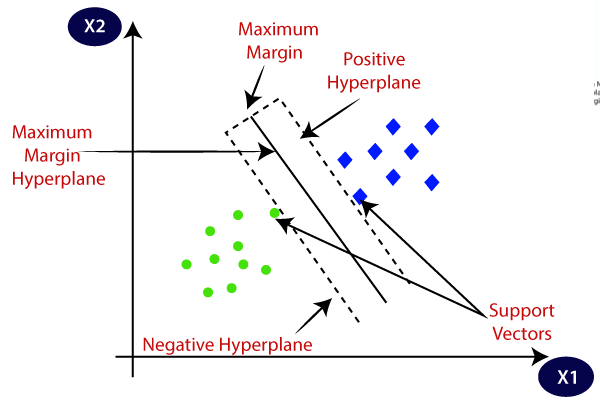

# Example:

SVM can be understood with the example that we have used in the KNN classifier.

Suppose we see a strange cat that also has some features of dogs, so if we want a model that can accurately identify 

whether it is a cat or dog, so such a model can be created by using the SVM algorithm. 

We will first train our model with lots of images of cats and dogs so that it can learn about different features of cats 

and dogs, and then we test it with this strange creature. 

So as support vector creates a decision boundary between these two data (cat and dog) and choose extreme cases (support 

vectors), it will see the extreme case of cat and dog. On the basis of the support vectors, it will classify it as a cat. 



# Consider the below diagram:
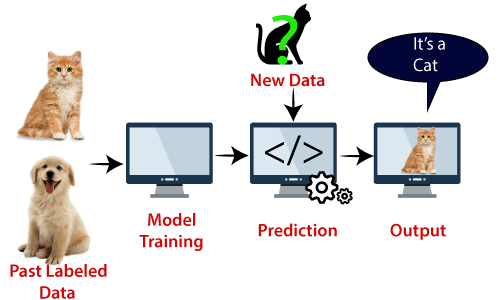

# Applications of SVM

SVM algorithm can be used for Face detection, image classification, text categorization, etc.

# Types of SVM

SVM can be of two types:

1.Linear SVM

2.Non Linear SVM

# Linear SVM:

Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes 

by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as 

Linear SVM classifier.

# Non-linear SVM: 

Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight 

line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

# Hyperplane and Support Vectors in the SVM algorithm

# Hyperplane:

There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out 

the best decision boundary that helps to classify the data points. 

This best boundary is known as the hyperplane of SVM.

The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features (as 

shown in image), then hyperplane will be a straight line. 

And if there are 3 features, then hyperplane will be a 2-dimension plane.

We always create a hyperplane that has a maximum margin, which means the maximum distance between the data points.

# Support Vectors:

The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are 

termed as Support Vector. 

Since these vectors support the hyperplane, hence called a Support vector.

# kernal c

Linear kernel: The choice of kernel function determines the shape of the decision boundary used to separate the different classes of data points. A linear kernel is often used when the data points are linearly separable, meaning that there exists a straight line that can perfectly separate the two classes of data. In this case, a linear kernel is the simplest and most efficient choice.

Regularization parameter C: The regularization parameter controls the trade-off between maximizing the margin (i.e. the distance between the decision boundary and the closest data points) and minimizing the classification error. A smaller value of C will prioritize maximizing the margin over minimizing the classification error, which can help prevent overfitting to the training data. A larger value of C will prioritize minimizing the classification error over maximizing the margin, which can lead to overfitting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 

In [2]:
data = pd.read_csv("irisdataset.zip")

In [4]:
# Explore the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


array([[<AxesSubplot:title={'center':'SepalWidthCm'}>]], dtype=object)

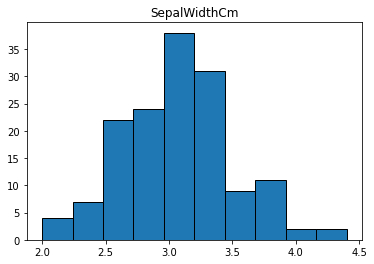

In [7]:
# Visualize the data

import matplotlib.pyplot as plt

data.hist(column='SepalWidthCm', grid=False, edgecolor='black')

<AxesSubplot:>

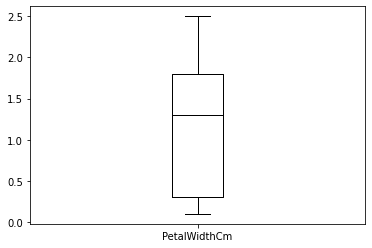

In [8]:
import matplotlib.pyplot as plt

data.boxplot(column=['PetalWidthCm'], grid=False, color='black')

<AxesSubplot:>

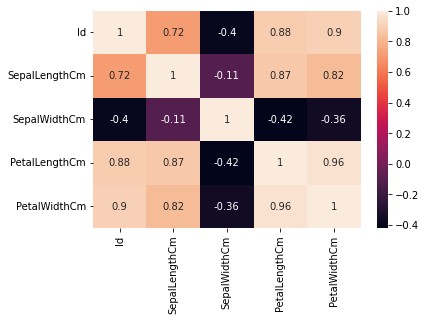

In [9]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [10]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [11]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

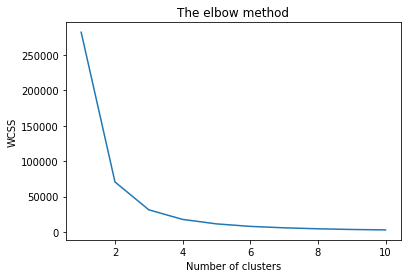

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

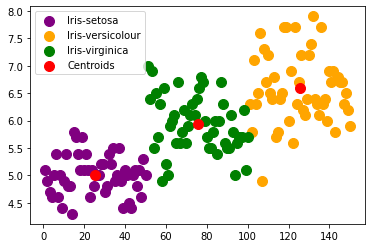

In [14]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("irisdataset.zip")
# Create an instance of LabelEncoder
l1 = LabelEncoder()

In [16]:
data.Species = l1.fit_transform(data.Species)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [17]:
x = data.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y = data.Species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [58]:
svm = SVC(kernel='linear')

# Train the SVM on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

In [59]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [60]:
# Calculate the accuracy of the SVM
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0
